<a href="https://colab.research.google.com/github/sangee1988/telecom-churn-analysis/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Telecom Churn Analysis




##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Customer churn refers to when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company. Businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer’s last interaction with the site or service. The full cost of customer churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. Reduction customer churn is important because cost of acquiring a new customer is higher than retaining an existing one. Reducing customer churn is a key business goal of every business. This case is related to telecom industry where particular organizations want to know that for given certain parameters whether a person will churn or not.

# **GitHub Link -**

https://github.com/sangee1988/telecom-churn-analysis

# **Problem Statement**


Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts. We have to Churn Rate on the basis of their usage data.


Recommend the steps to retain existing telecom customers. In the industry retaining customers is going challenging day by day and acquire new customers is even draining so retaining the existing customers is highly worths every effort than acquiring new customers.

Know the customer behavior and recommend the steps to retain existing customers and build the model to know which existing customers may leave.

Recommend the steps to retain existing telecom customers.

Build customer churn, prediction model.

#### **Define Your Business Objective?**

Maximize: Company's profit by retaining customer

Minimize: Customer churn by identifying the key cause of the problem

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Libraries
# we don't like warnings
import warnings
warnings.filterwarnings("ignore")
# Customer Analysis and EDA
import numpy as np
import pandas as pd



# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

%matplotlib inline
# We will use the Seaborn library
import seaborn as sns

sns.set()
#Loading Dataset
from google.colab import drive
drive.mount('/content/drive')


### Dataset Loading

We'll demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let's read the data (using read_csv), and take a look at the first 5 lines using the head method:

In [ ]:
df=pd.read_csv("/content/Telecom Churn.csv")


### Dataset First View

In [ ]:
df.head()

The last data column, Churn, is our target variable. It is binary: True indicates that that the company eventually lost this customer, and False indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a target.

In [ ]:
# tail of data
df.tail()

### Dataset Rows & Columns count

Let’s have a look at data dimensionality, feature names, and feature types:

In [ ]:
print(df.shape)

From the output, we can see that the table contains 3333 rows and 20 columns.

Now let's try printing out column names using columns:

In [ ]:
df.columns.values

### Dataset Information

We can use the info() method to output some general information about the dataframe:

In [ ]:
# Dataset Info
df.info()

bool, int64, float64 and object are the data types of our features. We see that one feature is logical (bool), 3 features are of type object, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with shape.

## ***2. Understanding Your Variables***



We can change the column type with the astype method. Let's apply this method to the Churn feature to convert it into int64:

In [ ]:
df["Churn"] = df["Churn"].astype("int64")

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [ ]:
# Dataset Describe
df.describe()

**Checking for Missing And Duplicate values**

#### Duplicate Values

In [ ]:

# Checking Duplicate Values
len(df[df.duplicated()])

there are no duplicate value present

#### Missing Values/Null Values

In [ ]:
#Checking missing values in train dataset
df.isna().sum()
df.isnull().sum()

In [ ]:
# Visualizing the missing values

In [ ]:
missing = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

 Let's have a look at the distribution of Churn:



In [ ]:
df["Churn"].value_counts()

2850 users out of 3333 are loyal; their Churn value is 0.

### What did you know about your dataset?

As of now There are 3333 rows and 20 columns in above dataset.

out of which there are 1 boolean data type i.e churn

8 float data type

8 integer data type,

3 object data type i.e catagarical value are there.

There are no missing value present so no need to do the missing value imputation.

And also there are no duplicate value present.

## 3. ***Data Wrangling***

### Data Wrangling Code

Here is an example where we group the data according to the values of the Churn variable and display statistics of three columns in each group:


In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Let’s do the same thing, but slightly differently by passing a list of functions to agg():

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

### What all manipulations have you done and insights you found?

Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the crosstab method:

In [ ]:
pd.crosstab(df["Churn"], df["International plan"])

The majority of customers without an international plan did not churn (2,664 customers), while a smaller proportion churned (346 customers).
Among customers with an international plan, a relatively higher proportion did not churn (186 customers) compared to those who churned (137 customers).

In [ ]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Customers without a voice mail plan are more likely to not churn compared to those with a voice mail plan. Among customers without a voice mail plan, the proportion of customers who did not churn is significantly higher (60.24%) compared to those who churned (12.09%).
On the other hand, for customers with a voice mail plan, the proportion of customers who did not churn is still higher (25.26%) but comparatively closer to the proportion of customers who churned (2.40%).

We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

First attempt at predicting telecom churn

Let's see how churn rate is related to the International plan feature. We'll do this using a crosstab contingency table and also through visual analysis with Seaborn (however, visual analysis will be covered more thoroughly in the next article).

In [ ]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

In [ ]:
sns.countplot(x="International plan", hue="Churn", data=df);

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – Customer service calls. Let's also make a summary table and a picture.

In [ ]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Among customers who did not churn (Churn = False):

The most common number of customer service calls was 1, with a count of 1,059 occurrences.
The least common number of customer service calls was 9, with a count of 0 occurrences.
Among customers who churned (Churn = True):

The most common number of customer service calls was 1, with a count of 122 occurrences.
The least common number of customer service calls was 8 and 9, with a count of 1 and 2 occurrences, respectively.

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – Customer service calls > 3. And once again, let's see how it relates to churn.

In [ ]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

In [ ]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);

Let's construct another contingency table that relates Churn with both International plan and freshly created Many_service_calls.

In [ ]:
pd.crosstab((df["Many_service_calls"] == 1) & (df["International plan"] == "Yes"), df["Churn"])

Therefore, predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details. It is much more convenient for us, humans, to grasp the main points this way than by reading many lines of raw data. It is amazing how much insight can be gained from seemingly simple charts created with available visualization tools.

Next, when we analyze the performance of a model or report results, we also often use charts and images. Sometimes, for interpreting a complex model, we need to project high-dimensional spaces onto more visually intelligible 2D or 3D figures.



In this article, we are going to get hands-on experience with visual exploration of data using popular libraries such as pandas, matplotlib and seaborn.

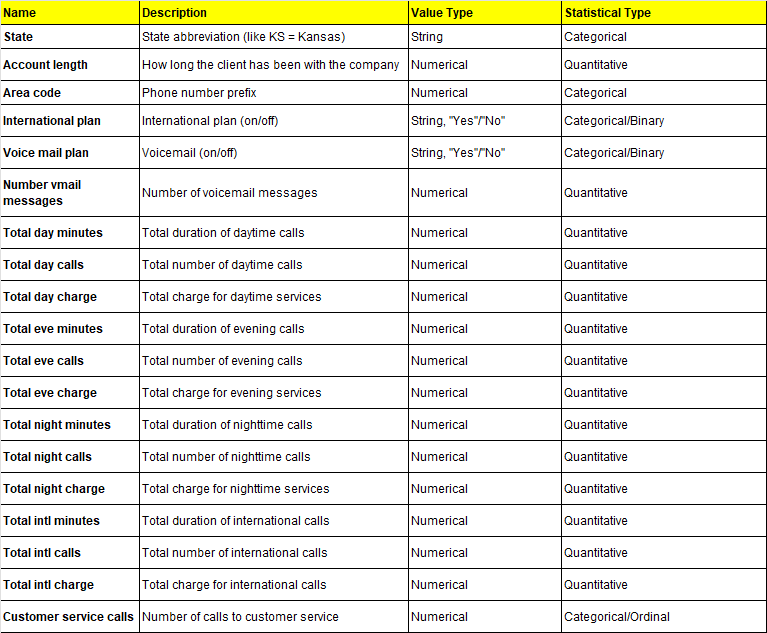

**Univariate visualization**


Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

2.1 Quantitative features
Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

#### Chart - 1

The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method hist().

In [ ]:
# Chart - 1 visualization code
#Checking distribution of data via pandas visualization
features = ["Total day minutes", "Total intl calls","Total intl minutes","Total day calls"]
df[features].hist(figsize=(10,6));

##### 1. Why did you pick the specific chart?
The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method hist().


It is clear that we have a Class Imbalance problem

##### 2. What is/are the insight(s) found from the chart?

"Total day minutes" histogram: The distribution of total minutes spent on daytime calls appears to be skewed to the right. There is a peak around the middle of the range, suggesting that a significant number of customers have a moderate number of daytime minutes.

"Total intl calls" histogram: The distribution of the number of international calls made by customers seems to be skewed to the right. The majority of customers appear to make a low number of international calls, as indicated by the peak on the left side of the histogram.

"Total intl minutes" histogram: The distribution of total international minutes used by customers also appears to be skewed to the right. Similar to the "Total intl calls" histogram, there is a peak on the left side, indicating that most customers use a relatively low number of international minutes.

"Total day calls" histogram: The distribution of the number of daytime calls made by customers appears to be approximately normally distributed, with a peak around the middle of the range. The histogram is relatively symmetrical, suggesting that the number of daytime calls is evenly distributed among customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights from the histograms alone may not directly lead to a positive business impact or negative growth. Histograms provide an initial understanding of the distribution and range of values for each variable but may not reveal the underlying business implications or actionable insights.

#### Chart - 2



There is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same variables:

In [ ]:
# Chart - 2 visualization code

df[features].plot(
    kind="density", subplots=True, layout=(2, 2), sharex=False, figsize=(10, 6));

##### 1. Why did you pick the specific chart?

it provides more clear insights than histogram.

##### 2. What is/are the insight(s) found from the chart?

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Density plots alone may not directly lead to a positive or negative business impact.

Density plots can be valuable for understanding the shape, skewness, multimodality, or any other distributional characteristics of the variables.

#### Chart - 3

Another useful type of visualization is a box plot. seaborn does a great job here:

In [ ]:
# Chart - 3 visualization code
# #Plotting Box Plot
sns.boxplot(x="Total intl calls", data=df);

##### 1. Why did you pick the specific chart?

it is a suitable visualization for analyzing the distribution and summary statistics of a numerical variable



##### 2. What is/are the insight(s) found from the chart?


**Range of "Total intl calls"**: The box plot provides information about the minimum and maximum values of the "Total intl calls" variable. The whiskers of the box plot extend to the minimum and maximum non-outlier values, giving an idea of the range of international calls made by customers.

**Median value**: The horizontal line inside the box represents the median of the "Total intl calls" variable. It indicates the middle value of the distribution, separating the lower 50% from the upper 50% of the data. The median value can provide insight into the typical or central tendency of the number of international calls made by customers.

**Variability**: The length of the box in the box plot represents the interquartile range (IQR), which captures the spread of the middle 50% of the data. A larger IQR suggests a greater variability in the number of international calls made by customers.

**Outliers** : Any data points beyond the whiskers of the box plot are considered outliers. Outliers represent values that significantly deviate from the typical range of the data. The presence of outliers in the box plot can indicate unusual or extreme values of the "Total intl calls" variable.

##### 3. Will the gained insights help creating a positive business impact?
Customer Satisfaction: The number of international calls made by customers can be an indicator of their engagement or usage of international services.

Cost Optimization: The box plot can also provide insights into potential cost optimization strategies

Customer Retention: The presence of outliers in the box plot may indicate customers who make an unusually high number of international calls

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);


##### 1. Why did you pick the specific chart?

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

##### 2. What is/are the insight(s) found from the chart?

The violin plot shows the kernel density estimation of the data, providing information about the shape and density of the distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Service Optimization: By analyzing the distribution and central tendency of the "Total intl calls" variable, businesses can gain insights into customer behavior and usage patterns.

Customer Segmentation: Understanding the spread and variability of international call usage can help businesses identify customer segments with different usage patterns.

Resource Allocation: Analyzing the data and identifying outliers can help businesses understand customers who make an unusually high number of international calls.

2.2 **Categorical and binary features**

Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

Frequency table
Let's check the class balance in our dataset by looking at the distribution of the target variable: the churn rate. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the value_counts() method:

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#Target Variable data distribution
plt.figure(figsize=(4,4))
sns.countplot(x = df.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 10)
plt.ylabel('Count', fontsize= 6)
plt.title("Distribution of Customer Churning ",fontsize= 10)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot
The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn's function countplot(). There is another function in seaborn that is somewhat confusingly called barplot() and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

It is clear that we have a Class Imbalance problem

Imbalance in Churn Classes: The count plot provides information about the distribution of customer churn in the dataset. By observing the heights of the bars, you can determine the number of customers who churned (Churn = True) versus those who did not churn (Churn = False).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights from the count plot for customer churn can help in creating a positive business impact and identifying potential areas for improvement. Additionally, there are insights that, if not addressed, can lead to negative growth. Here's a breakdown:

Positive Business Impact:

Customer Retention Strategies: By analyzing the count plot and understanding the distribution of churned and non-churned customers, businesses can develop targeted customer retention strategies. This may involve identifying factors leading to churn, implementing proactive measures to retain customers, and enhancing customer satisfaction and loyalty. Effective retention strategies can lead to positive business impact by reducing churn rates, improving customer lifetime value, and fostering long-term customer relationships.

Improved Customer Experience: The insights from the count plot can highlight the importance of providing an exceptional customer experience. By understanding the reasons behind customer churn, businesses can identify areas for improvement in their products, services, or customer support. Addressing these areas can lead to higher customer satisfaction, increased loyalty, and positive word-of-mouth recommendations.

Negative Growth Considerations:

High Churn Rate: If the count of churned customers is significantly higher compared to the count of non-churned customers, it indicates a high churn rate. This insight can be a potential negative growth factor as it suggests that a substantial number of customers are discontinuing their relationship with the business. A high churn rate can result in revenue loss, decreased market share, and increased customer acquisition costs.

Customer Dissatisfaction: A high count of churned customers may indicate potential customer dissatisfaction or negative experiences. This insight raises concerns about the quality of products, services, or overall customer experience. If not addressed, customer dissatisfaction can lead to negative growth, including declining sales, negative brand reputation, and difficulty in attracting new customers

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Groupby --> size to represent ---> unstack the category
#train.groupby(["state", "Churn"]).size().unstack(level=-1).head()

#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):

    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

In [ ]:
#State Wise Churning of customer
diff_bar('State','Churn')

##### 1. Why did you pick the specific chart?

The bar chart is a suitable choice when comparing different categories or groups

##### 2. What is/are the insight(s) found from the chart?

Churn Variation by State: The heights of the bars indicate the count or frequency of churned and non-churned customers for each state. By comparing the heights of the bars, you can identify states with higher or lower churn rates.

Regional Churn Patterns: The bar chart provides insights into regional churn patterns. States with higher bars indicate a higher count of churned customers, suggesting a relatively higher churn rate. Conversely, states with lower bars indicate a lower count of churned customers, suggesting a relatively lower churn rate.

Identifying Churn Hotspots: By examining the chart, you can identify states where customer churn is particularly prominent or where the churn rate deviates significantly from the average. These states may require closer attention in terms of customer retention strategies, customer support, or targeted marketing efforts.

State-Specific Factors: The bar chart can prompt further investigation into state-specific factors influencing churn. It highlights the importance of considering regional or local dynamics, such as customer demographics, market conditions, competition, or cultural preferences, that may contribute to variations in churn rates across states.

Comparison and Benchmarking: The bar chart allows for a visual comparison of churn rates between states. By comparing the heights of the bars, you can identify states with relatively higher or lower churn rates compared to others. This insight can guide benchmarking efforts and help identify states that may serve as potential best practices or areas for improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the bar chart comparing churn status across different states can potentially help in creating a positive business impact. However, there are also insights that, if not addressed, can lead to negative growth. Here's a breakdown:

Positive Business Impact:

Regional Targeting: The insights from the bar chart can aid in regional targeting and tailoring business strategies based on the variations in churn rates across states. Businesses can focus their marketing efforts, customer retention initiatives, and resource allocation on states with higher churn rates, aiming to reduce churn and improve customer satisfaction in those regions.

Customer Retention Strategies: Understanding the states with lower churn rates can provide insights into potential best practices or factors contributing to customer loyalty. By studying these states, businesses can identify successful retention strategies and apply them to other regions, thereby improving customer retention rates and driving positive business impact.

Improved Customer Support: The insights gained from the bar chart can indicate states with higher churn rates, which may signal potential customer dissatisfaction or issues. By targeting these states for improved customer support, businesses can address customer concerns, enhance the overall customer experience, and increase customer loyalty.

Negative Growth Considerations:

High Churn States: If the bar chart reveals states with significantly higher churn rates compared to others, it indicates areas of concern that can lead to negative growth. A high churn rate in certain states implies a larger number of customers discontinuing their relationship with the business. This can result in revenue loss, decreased market share, and increased customer acquisition costs.

Regional Challenges: The variations in churn rates across states may indicate regional challenges or factors that are negatively impacting customer retention. Ignoring these challenges or failing to address the underlying issues can lead to negative growth in those regions. It is important to identify and address any regional-specific factors that contribute to high churn rates.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
#area_code Wise Churning of customer
diff_bar('Area code','Churn')



##### 1. Why did you pick the specific chart?

  This bar chart that compares two categorical variables, in this case, 'Area code' and 'Churn'.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the churn rates across different area codes. By examining the bars, you can identify variations in the count of churned and non-churned customers for each area code. This allows you to understand the differences in churn patterns across different geographic regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Strategies: The insights from the chart can guide businesses in developing targeted strategies to reduce churn and improve customer retention. By identifying area codes with higher churn rates, businesses can allocate resources and implement initiatives tailored to those specific regions. This targeted approach can lead to improved customer satisfaction, loyalty, and positive business impact.

Customer Segmentation: The chart highlights the importance of considering geographic segmentation. By understanding churn patterns across different area codes, businesses can segment their customer base accordingly and personalize their offerings and marketing strategies. This can result in increased customer engagement, higher conversion rates, and improved business performance.

Regional Optimization: The insights gained from the chart can help businesses optimize their operations and resource allocation at a regional level. By identifying area codes with lower churn rates, businesses can prioritize those regions for expansion, allocate marketing efforts accordingly, and optimize service delivery to maximize growth opportunities.

Negative Growth Considerations:

High Churn Areas: If the chart reveals area codes with consistently high churn rates, it may indicate potential challenges or issues that can lead to negative growth. High churn rates suggest dissatisfaction or problems within those regions, which can result in revenue loss, decreased market share, and negative business impact. It is crucial for businesses to identify the underlying reasons for high churn rates and take corrective actions to mitigate negative growth.

Competitive Landscape: The chart may uncover variations in churn rates across area codes, indicating differences in the competitive landscape. If certain area codes consistently exhibit higher churn rates compared to others, it could indicate intense competition or challenges in providing competitive offerings. Businesses operating in such areas need to carefully assess their competitive position, differentiate their products or services, and implement customer retention strategies to avoid negative growth.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
#International_Plan Wise Churning of customer
diff_bar('International plan','Churn')

##### 1. Why did you pick the specific chart?

 The diff_bar function generates a bar chart that compares two categorical variables, 'International plan' and 'Churn'. This allows for a visual comparison between these variables and provides insights into the relationship between customers having an international plan and their churn status.

##### 2. What is/are the insight(s) found from the chart?

Impact of International Plan on Churn: By comparing the heights of the bars, you can observe the difference in churn rates between customers with an international plan and those without. If the churn rate for customers with an international plan is noticeably higher or lower compared to those without, it indicates a potential impact of the international plan on customer churn.

Effectiveness of International Plans: The chart can provide insights into the effectiveness of international plans in retaining customers. If customers with an international plan have a lower churn rate, it suggests that the plan may be contributing to higher customer loyalty and retention. Conversely, if customers with an international plan have a higher churn rate, it may indicate dissatisfaction or other factors associated with the international plan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Targeted Retention Strategies: The insights from the chart can guide businesses in developing targeted retention strategies for customers with an international plan. By understanding the relationship between having an international plan and churn, businesses can identify specific pain points, address customer concerns, and implement initiatives to improve customer satisfaction and loyalty. This targeted approach can lead to increased retention rates and positive business impact.

Customer Segmentation: The chart highlights the importance of customer segmentation based on the presence or absence of an international plan. This insight allows businesses to tailor their marketing and customer retention efforts based on the specific needs and behaviors of each segment. By understanding the churn patterns within each segment, businesses can develop personalized strategies to increase customer engagement and satisfaction.

Negative Growth Considerations:

Negative Impact of International Plans: If the chart reveals that customers with an international plan have a higher churn rate compared to those without, it may indicate potential challenges or issues related to the international plan. This insight can lead to negative growth if not addressed appropriately. Businesses should assess the reasons behind the higher churn rate and take corrective actions to mitigate negative growth.

Dissatisfaction with International Plan: If customers with an international plan exhibit a higher churn rate, it suggests a potential dissatisfaction with the plan itself. This dissatisfaction may arise from factors such as pricing, call quality, available features, or customer support related to international services. Ignoring or neglecting these concerns can result in negative growth, as customers may seek alternative providers that better meet their international communication needs.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
#Number of Customer_Service Call Wise Churning of customer
diff_bar('Customer service calls','Churn')

##### 1. Why did you pick the specific chart?


The diff_bar function generates a bar chart that compares two categorical variables, 'Customer service calls' and 'Churn'. This allows for a visual comparison between the number of customer service calls made and the churn status.

##### 2. What is/are the insight(s) found from the chart?

 By analyzing the heights of the bars, you can observe how the number of customer service calls relates to churn rates. This insight can help understand the effect of customer service interactions on customer retention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Service Call Optimization: The chart provides insights into the relationship between the number of customer service calls and churn. By analyzing the heights of the bars, businesses can identify the optimal range or level of service calls associated with lower churn rates. This insight can guide businesses in optimizing their customer service processes, reducing the need for excessive calls, and improving customer satisfaction.

Customer Experience Improvement: Understanding the impact of customer service calls on churn can help businesses focus on enhancing the customer experience during these interactions. By analyzing any patterns or trends in churn rates based on the number of service calls, businesses can identify areas for improvement, such as call resolution efficiency, agent training, or self-service options. Improving the customer experience can positively impact customer satisfaction, loyalty, and business growth.

Negative Growth Considerations:

Excessive Service Calls: If the chart shows higher churn rates associated with a high number of customer service calls, it may indicate underlying issues such as dissatisfaction, ineffective issue resolution, or poor service quality. This insight suggests that excessive service calls may contribute to negative growth by frustrating customers and leading them to seek alternatives. Businesses should address the root causes and strive to reduce the need for multiple service calls.

Inefficient Issue Resolution: If the chart reveals higher churn rates for customers with a certain number of service calls, it may imply that the issue resolution process is not effective or satisfactory. Customers experiencing prolonged or recurring problems despite multiple service calls may become dissatisfied and more likely to churn. Improving issue resolution efficiency and effectiveness can help mitigate negative growth and retain customers.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
#No. of Customer Churning and had a Voice mail plan
diff_bar('Voice mail plan','Churn')


##### 1. Why did you pick the specific chart?

The chart compares two categorical variables, 'Voice mail plan' and 'Churn', using bar plots. It allows for a visual comparison between customers with and without a voice mail plan in terms of their churn status.

##### 2. What is/are the insight(s) found from the chart?

By analyzing the heights of the bars, you can observe the difference in churn rates between customers with a voice mail plan and those without. If the churn rate for customers with a voice mail plan is noticeably higher or lower compared to those without, it indicates a potential impact of the voice mail plan on customer churn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Tailored Retention Strategies: The insights from the chart can guide businesses in developing tailored retention strategies for customers with and without a voice mail plan. By understanding the relationship between having a voice mail plan and churn, businesses can identify specific needs, preferences, and pain points, and design retention initiatives accordingly. This targeted approach can lead to increased customer satisfaction, loyalty, and positive business impact.

Value of Communication Features: If the chart reveals a lower churn rate for customers with a voice mail plan, it suggests that additional communication features, such as voice mail, can contribute to customer retention. Businesses can leverage this insight to promote the value of these features, enhance their offerings, and improve customer satisfaction.

Negative Growth Considerations:

Dissatisfaction with Voice Mail Plans: If the chart shows a higher churn rate for customers with a voice mail plan, it may indicate potential dissatisfaction or issues related to the plan. This insight suggests that the voice mail plan may not meet customer expectations, provide sufficient value, or address their communication needs. Neglecting these concerns can result in negative growth as customers seek alternative providers that better meet their requirements.

Preference for Alternate Communication Methods: If customers with a voice mail plan exhibit a higher churn rate, it may suggest that they prefer alternative communication methods or platforms over voice mail. This insight indicates that businesses need to adapt their offerings and communication strategies to align with evolving customer preferences. Ignoring these preferences can lead to negative growth as customers migrate to more preferred communication options.

3. Multivariate visualization
Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

3.1 Quantitative vs. Quantitative

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
#Scatter plot function
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

##### 1. Why did you pick the specific chart?

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the seaborn library:

The scatter plot allows you to visually explore the relationship between two continuous variables, "Total day minutes" and "Total night minutes". Each data point represents an observation, with one variable plotted on the x-axis and the other on the y-axis. This type of chart is useful for examining the nature and strength of the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the seaborn library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Relationship Understanding: The scatter plot helps understand the relationship between "Total day minutes" and "Total night minutes". If there is a clear positive correlation between the two variables (points tend to form an upward-sloping pattern), it suggests that customers who use more minutes during the day also tend to use more minutes during the night. This understanding can inform targeted marketing strategies or service plans to cater to customer usage patterns.

Usage Pattern Identification: By analyzing the scatter plot, businesses can identify any distinct usage patterns or clusters among their customers. For example, if there are discernible clusters of points representing different customer segments (e.g., heavy day users, heavy night users, balanced users), businesses can tailor their offerings, pricing plans, or promotions to meet the specific needs and preferences of each segment.

Negative Growth Considerations:

Unusual Usage Patterns: If the scatter plot reveals unusual or unexpected usage patterns, such as customers with extremely high day minutes but very low night minutes, it may indicate anomalies or outliers in the data. These outliers could represent potential issues like data entry errors or fraudulent usage. Failing to identify and address such anomalies could result in negative business impact, including revenue loss or customer dissatisfaction.

Imbalanced Usage: If there is a significant imbalance in the usage patterns between day and night minutes, it may indicate a service quality issue. For example, if customers are heavily using day minutes but have limited usage during the night, it could suggest that the nighttime service or pricing plans are not attractive or meeting customer needs. Addressing this imbalance and adjusting service offerings can prevent negative growth by catering to customers' usage preferences.

The function jointplot() plots two histograms that may be useful in some cases.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

##### 1. Why did you pick the specific chart?

Bivariate Analysis: The joint plot allows you to explore the relationship between two continuous variables, "Total day minutes" and "Total night minutes". It displays both a scatter plot and a histogram in a single visualization, providing insights into the joint distribution and correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?

If the scatter plot shows a clear upward-sloping pattern, it indicates a positive correlation between "Total day minutes" and "Total night minutes". This means that customers who use more minutes during the day tend to also use more minutes during the night. This insight suggests that there might be a consistent usage pattern across different times of the day for customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Usage Pattern Understanding: The insight into the positive correlation between "Total day minutes" and "Total night minutes" can help businesses understand customer usage patterns. This understanding can inform the development of targeted marketing strategies, service plans, or promotions that cater to customers' usage preferences and maximize customer satisfaction.

Service Customization: By analyzing the concentration of data points in the scatter plot, businesses can identify common usage patterns among customers. This insight can be used to customize service offerings, pricing plans, or features to align with the preferences and needs of different customer segments. By tailoring their offerings to match customer preferences, businesses can enhance customer loyalty and retention.

Negative Growth Considerations:

Imbalanced Usage Patterns: If the scatter plot reveals imbalanced or unusual usage patterns, such as a majority of customers heavily using either day minutes or night minutes but not both, it may indicate a potential issue. Imbalanced usage patterns can suggest that certain services or pricing plans are not appealing or meeting customer needs. Neglecting these imbalances can result in negative growth as customers may seek alternative providers that better meet their usage requirements.

Outlier Analysis: The identification of outliers in the scatter plot can provide insights into customers with extreme or irregular usage patterns. Outliers could represent potential issues such as data entry errors, fraudulent activity, or unique customer behavior. Ignoring or failing to address these outliers can lead to negative growth, including revenue loss, customer dissatisfaction, or increased risk.

#### Chart - 14 - Correlation Heatmap

Correlation matrix
Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the

In [ ]:
# Correlation Heatmap visualization code
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix , dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1);
plt.show()
#f.savefig('heatmap.png')

##### 1. Why did you pick the specific chart?


 The heatmap provides a visual representation of the correlation coefficients between pairs of numerical variables

##### 2. What is/are the insight(s) found from the chart?

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [ ]:
#%config InlineBackend.figure_format = 'retina'

##### 1. Why did you pick the specific chart?

Scatterplot matrix
In some cases, we may want to plot a scatterplot matrix such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The diagonal plots in the pair plot represent the distributions of individual numerical variables. They provide insights into the shape, spread, and central tendency of each variable. These distributions can help identify any outliers, skewness, or patterns in the data.

Now, Let's create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True).

In [ ]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

num_features = len(numerical)
nrows = int(np.ceil(num_features / 3))  # Calculate the number of required rows
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(10, 20  ))



for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 3), idx % 3]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)

fig.tight_layout()

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: Total day minutes, Customer service calls, and Number vmail messages. Later in this course, we will learn how to determine feature importance in classification using Random Forest or Gradient Boosting; there, we will see that the first two features are indeed very important for churn prediction.



An interesting observation: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called catplot(). For example, let's visualize the interaction between Total day minutes and two categorical variables in the same plot:

In [ ]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.9,
);

From this, we could conclude that, starting with 4 calls, Total day minutes may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

As we saw earlier in this article, the variable Customer service calls has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a count plot. Now, we are interested in the relationship between this ordinal feature and the target variable Churn.

Let's look at the distribution of the number of calls to customer service, again using a count plot. This time, let's also pass the parameter hue=Churn that adds a categorical dimension to the plot:

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

An observation: the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between Churn and the binary features, International plan and Voice mail plan.

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

An observation: when International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with Voice mail plan.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


To retain customers :*

● The company should give incentives who spend more time on calls during day time

● The company should concentrate more on pricing than features.

● The company should lower prices for international plans and its hourly call rates.

● The company should decrease the frequency of customer service calls received by customers.

# **Conclusion**

After performing exploratory data analysis on the data set, this is what we have incurred from data:*

*There are some states where the churn rate is high as compared to others may be due to low network coverage.*
**Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns* **In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge* **IN the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good. *Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate.* **In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.* **In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.*

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***